In [1]:
import pandas as pd
import numpy as np

The ‘Russian Polls’ project was inspired by a Russian YouTuber. In one of his videos he addresses  the  increased popularity of President Putin and the Russian government in the polls, after the “military operation” in Ukraine. 
 
youTube channel : https://www.youtube.com/c/MultiNfz
youTube video : https://www.youtube.com/watch?v=_uQCNjIHeqU

NFKRZ seems to suggest that Polls in Russia are conducted mainly by government linked organizations, the only independent polling organization is the Levada Center. NFKRZ  goes on to suggest that the 1) the people choosing to answer the polls are not necessarily representative of the population, 2)there might be a general mistrust of polling organizations, 3) the introduction of the "Fake Law" or "Law on Military Censorship"  as it is known in the media, has made people reluctant to criticize the Government. 
(See Appendix1 : for a brief history of laws aimed at protecting the Russian public from internal and external influences seeking to undermine the Russian government, society and values (please note: The constitution of the Russian Federation prohibits censorship in paragraph 5 of Article 29 , https://en.wikipedia.org/wiki/Censorship_in_the_Russian_Federation)).

Here, the aim is to gain an intuition of how much support there is for the war in Ukraine, and how much of this support may be a consequence of changes in legislation. 


Source Data: 
The data in the project comes from the Levada Center web-page (not row data), https://www.levada.ru/en/ratings/


The Levada Center conducts a number of polls on a monthly/bimonthly basis, here I will concentrate on the following: 

Approve of the activities of the President of Russia
Approve of the activities of the Government
Russia is moving in the right direction


**Gathering the data**

In [2]:
# import requests

# url = 'https://www.levada.ru/en/ratings/'
# html = requests.get(url).content
# df_list = pd.read_html(html)

In [3]:
# naming = ['approve_activities_President_Russia','approve_activities_President_Russia',
#           'approve_activities_prime minister','approve_activities_prime minister',
#           'approve_activities_Government', 'approve_activities_Government', 
#           'Russia_moving_in_right_direction','Russia_moving_in_right_direction',
#           'Attitude_to_US', 'Attitude_to_US', 
#           'Attitude_to_EU','Attitude_to_EU',
#           'Social_Sentiment_index','Social_Sentiment_index',
#           'consumer_index', 'consumer_index', 
#           'unemployment_index','unemployment_index']

In [4]:
# ##Saved data to avoid re-downloading
# listing =[]

# for item in range(0, len(df_list), 2):
#     list1 = df_list[item:item+2]
#     df = pd.DataFrame(data=list1[1])
#     new_header = (df.iloc[0])
#     new_header =(df.iloc[0].apply(lambda x: '{0:0<6}'.format(x)))
#     df = df[1:]
#     df.columns = new_header 
#     df1 = pd.DataFrame(data=list1[0])
#     testi = df1.reset_index().T.reset_index().T.reset_index()

#     new_df = pd.concat([testi, df], axis=1)
#     new_df = new_df.drop(columns=['index', 0])
#     new_df = new_df.drop([0, 0])


#     new_df.to_csv('./'+naming[item]+'.csv', index=False)

In [5]:
# link = "https://en.wikipedia.org/wiki/List_of_wars_involving_Russia"
# tables = pd.read_html(link)
# data= tables[14].iloc[1:]

# data.to_csv('./wiki_list_wars_rus.csv', index=False)

In [6]:
##Saved data to avoid re-downloading
#revised function to accomadate discrepancies in data dates

import pandas as pd
import numpy as np


def re_orient2(data, when):

    stringo = data[40:-4]
    data =pd.read_csv(data)
    data= data.T
    header_row = 0
    data.columns =data.iloc[header_row]
    data.reset_index(inplace=True)
    data.drop([0,1], inplace=True)
    data['index'] = data['index'].str.replace('.','-')
    data[['month', 'year']] = data['index'].str.split('-', 1, expand=True)
    data['year'] =(data['year'].apply(lambda x: '{0:0<4}'.format(x)))
    data['numeric_year']= pd.to_numeric(data['year'], errors="coerce")

    data_all = data[data['year'].map(len) ==4]
    data_drop= data[data['year'].map(len) >4]

    all_nan = data[data.isna().any(axis=1)]
    all_nan= pd.concat([all_nan,data_drop])
    #print(all_nan) #print part of the year data that is year-1 ( duplicate : unclear why 2005 has double entry from Fec to Jan and 2000 had 2 months/ dropping as 2005 is far into the past and 2000 has only 2 months)
    all_nan.to_csv('./dropped_values.csv', index=False)
    data_all= data_all.drop(['numeric_year'], axis=1)
    data_all = data_all.dropna()
    data_all = data_all.drop(['index'], axis=1)
    data_all = data_all.astype(int)
    data_all = data_all[data_all['year']>=when]

    data_all['day'] = 1 #artificail value added to form date
    data_all['Date'] = pd.to_datetime(data_all[['month','day','year',]], format="%m/%d/%Y")
    data_all.insert(loc=0, column='Datetime', value=data_all['Date'])
    data_all =data_all.drop(['day', 'Date', 'month', 'year'], axis=1)
    data_all.columns = [f'{stringo}_{i}' if i not in ['Datetime'] else f'{i}' for i in data_all.columns]

    return data_all

In [7]:
import os

file_names =[]
df_list = []

def read_df(root, when):
    directory = os.listdir(root)

    file_names = [f for f in directory if f.endswith(".csv")]
    file_names = [x for x in file_names if not x.startswith('wiki')]
    file_names = [x for x in file_names if not x.startswith('dropped')]

    for file in file_names:
        temp = re_orient2(root_dir+file, when)
        df_list.append(temp)

    return df_list

In [8]:
root_dir='../input/russian-polls-investigation/'
data_list = read_df(root_dir, 2008)
print(len(data_list))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


9


Source Data: 
The data in the project comes from the Levada Center web-page (not row data), https://www.levada.ru/en/ratings/


The Levada Center conducts a number of polls on a monthly/bimonthly basis, here I will concentrate on the following: 

Approve of the activities of the President of Russia
Approve of the activities of the Government
Russia is moving in the right direction

From 2008 to now (April 2022)


Presidential approval is high, for example highest approval rate for Vladimir Putin was 89 %( June 2015); while the lowest score was 59% (April-May 2020);

To offer some perspective,  in the US the highest  approval rating  achieved by: 
president Biden is 63%(April-May 2021), 
president Trump is 49% (March 2019), 
president Obama 76%(February 2009) , 
These highs are generally followed by sinkings in approval rates (around the 30% mark) . 
(Source: “https://ropercenter.cornell.edu/presidential-approval/highslows”)

In [9]:
president_approval = data_list[8].iloc[:, 0:2]
president_approval.columns = ['Datetime', 'Approve_activities_President']
maxo = president_approval[president_approval['Approve_activities_President']==president_approval['Approve_activities_President'].max()]
mini = president_approval[president_approval['Approve_activities_President']==president_approval['Approve_activities_President'].min()]

print('Highest approval value:\n')
print(maxo, '\n')
print('Lowest approval value:\n')
print(mini)


Highest approval value:

      Datetime  Approve_activities_President
191 2015-06-01                            89 

Lowest approval value:

      Datetime  Approve_activities_President
248 2020-04-01                            59
249 2020-05-01                            59


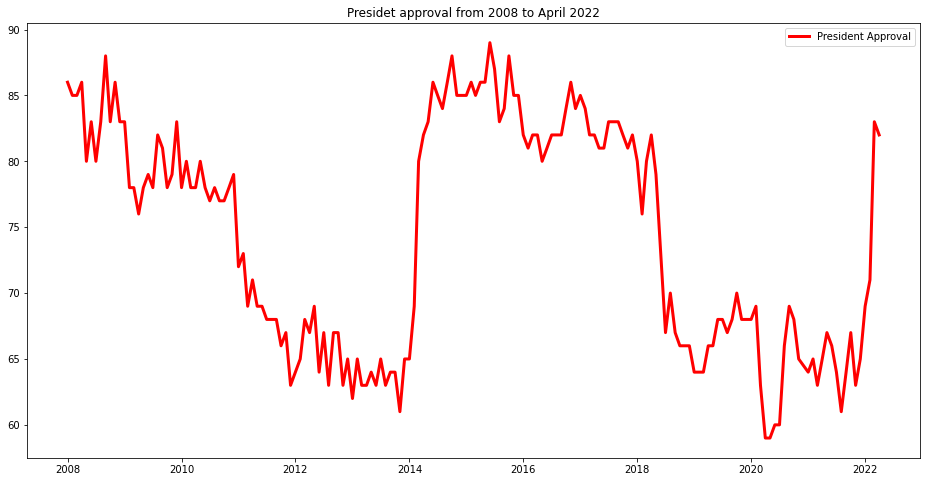

In [10]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(16, 8))

plt.plot(president_approval.Datetime,president_approval['Approve_activities_President'], linewidth=3, color='red' )
plt.legend(['President Approval'])
plt.title('Presidet approval from 2008 to April 2022')
plt.savefig('./pres_app.jpg')

In [11]:
goverment_approval = data_list[6].iloc[:, 0:2]
goverment_approval.columns = ['Datetime', 'Approve_activities_Goverment']

Comparing the above to the Government approval:

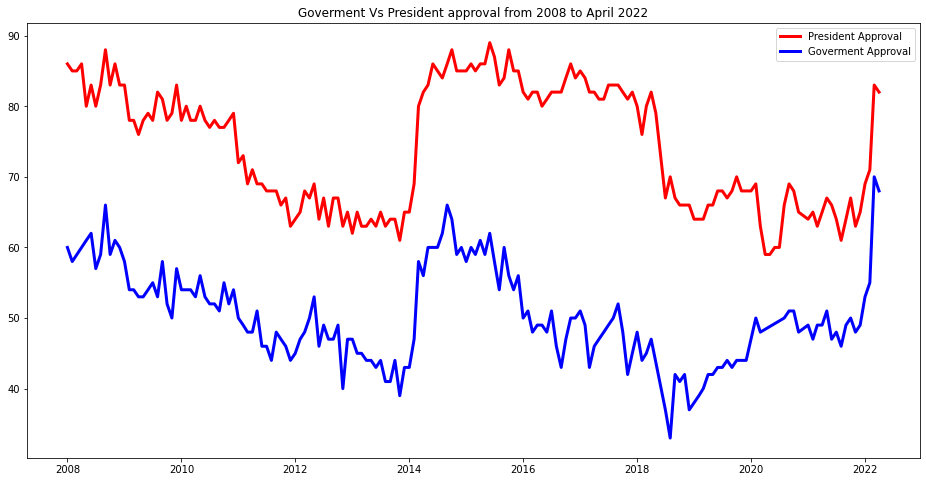

In [12]:
plt.subplots(figsize=(16, 8))

plt.plot(president_approval.Datetime,president_approval['Approve_activities_President'], linewidth=3, color='red' )
plt.plot(goverment_approval.Datetime,goverment_approval['Approve_activities_Goverment'], linewidth=3, color='blue' )
plt.legend(['President Approval','Goverment Approval'])
plt.title('Goverment Vs President approval from 2008 to April 2022')
plt.savefig('./gov_app.jpg')

The government does not seem to enjoy the same amount of support as the president; in the next graph I compare ‘President Approval’, ‘Government approval’  with  ‘Russia moving in the right direction Index’.

In [13]:
rus_right=data_list[3].iloc[:, 0:2]
rus_right.columns=['Datetime', 'Russia_move_right_dir']

In [14]:
merge_pres_gov= pd.merge(president_approval,goverment_approval, on='Datetime', how='inner')
result= pd.merge(merge_pres_gov, rus_right,  on='Datetime', how='inner' )
#result.tail()

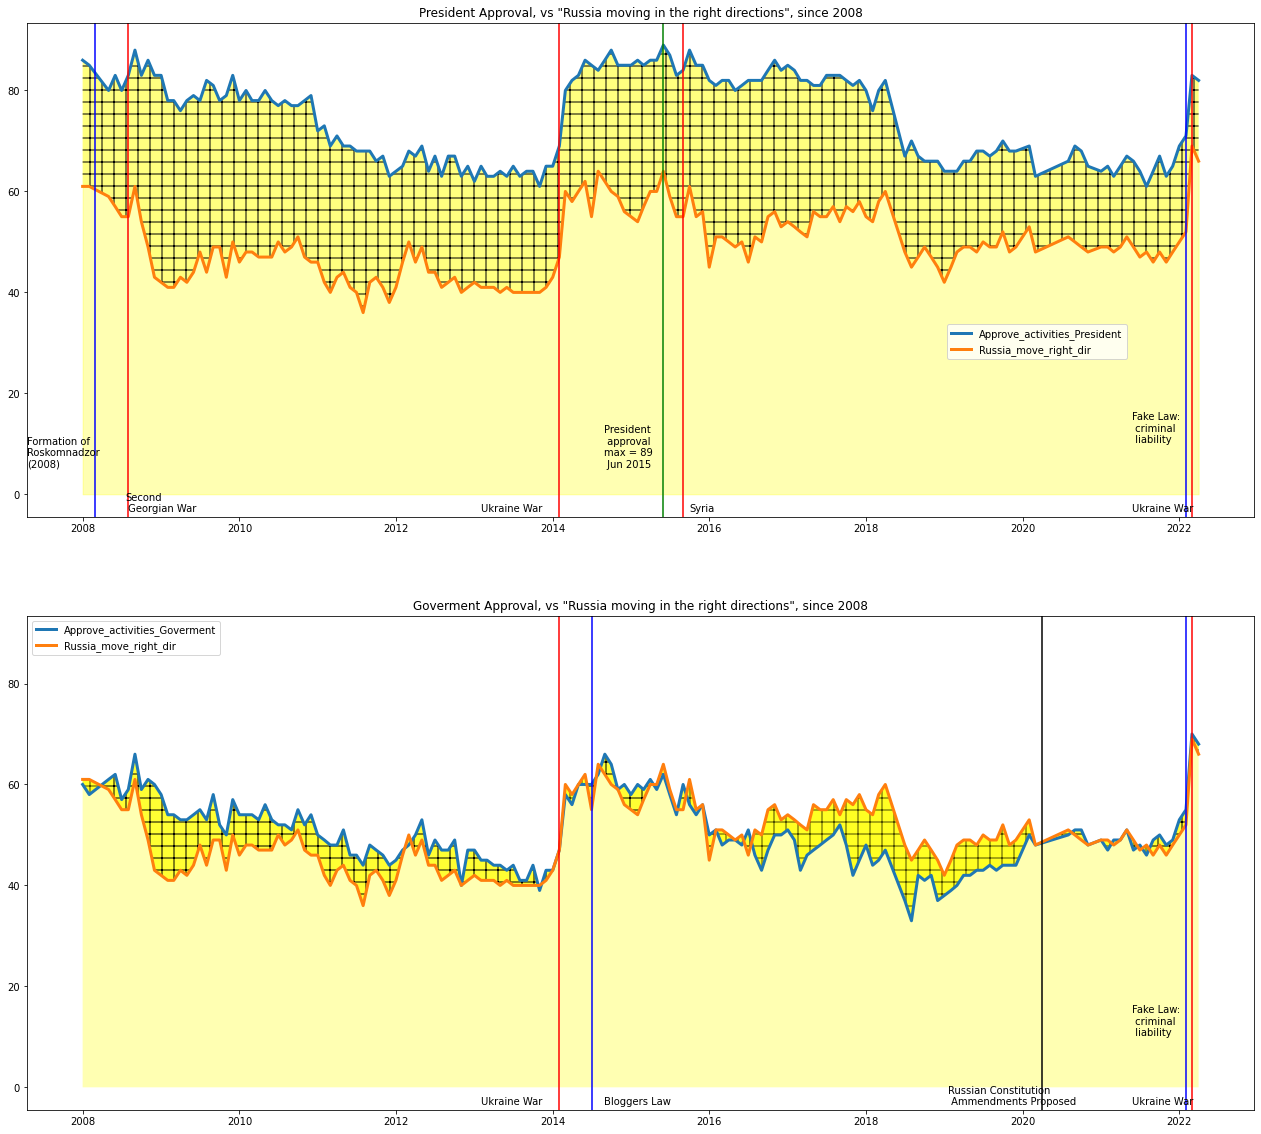

In [15]:
import matplotlib.pyplot as plt

fig, (ax1, ax2,) = plt.subplots(2, 1, sharey=True, figsize=(22,20)) #sharex=True, 
locs = ["upper left", "lower left", "center right"]
 
ax1.plot( result.Datetime ,result[['Approve_activities_President', 'Russia_move_right_dir']],linewidth=3)

ax1.fill_between(result.Datetime,result['Approve_activities_President'], result['Russia_move_right_dir'], alpha=.5, hatch='+', facecolor='yellow')
ax1.fill_between(result.Datetime,result['Russia_move_right_dir'], alpha=0.3, color='yellow')

ax1.axvline(pd.Timestamp('6-2015'),color='g', )
ax1.annotate('President\n approval \nmax = 89\n Jun 2015',xy=(0.47, 0.1), xycoords='axes fraction'),

ax1.axvline(pd.Timestamp('3-2008'),color='b', )
ax1.annotate('Formation of \nRoskomnadzor \n(2008)',xy=(0.00, 0.1), xycoords='axes fraction'),

ax1.axvline(pd.Timestamp('8-2008'),color='r', )
ax1.annotate('Second\n Georgian War',xy=(0.08, 0.01), xycoords='axes fraction'),

ax1.axvline(pd.Timestamp('2-2014'),color='r', )
ax1.annotate('Ukraine War',xy=(0.37, 0.01), xycoords='axes fraction'),

ax1.axvline(pd.Timestamp('9-2015'),color='r', )
ax1.annotate('Syria',xy=(0.54, 0.01), xycoords='axes fraction'),

ax1.axvline(pd.Timestamp('2-2022'),color='b', )
ax1.annotate('Fake Law:\n criminal\n liability',xy=(0.9, 0.15), xycoords='axes fraction'),

ax1.axvline(pd.Timestamp('3-2022'),color='r', )
ax1.annotate('Ukraine War',xy=(0.9, 0.01), xycoords='axes fraction'),
ax1.legend(['Approve_activities_President', 'Russia_move_right_dir'], loc=1, bbox_to_anchor=(0.9,0.4))

ax1.set_title('President Approval, vs "Russia moving in the right directions", since 2008')



ax2.plot( result.Datetime ,result[['Approve_activities_Goverment','Russia_move_right_dir']], linewidth=3)
ax2.fill_between(result.Datetime,result['Approve_activities_Goverment'],result['Russia_move_right_dir'], alpha=.8, hatch='+', facecolor='yellow')
ax2.fill_between(result.Datetime,result['Russia_move_right_dir'], facecolor="yellow", alpha=0.3)

ax2.axvline(pd.Timestamp('2-2014'),color='r', )
ax2.annotate('Ukraine War',xy=(0.37, 0.01), xycoords='axes fraction'),

ax2.axvline(pd.Timestamp('7-2014'),color='b', )
ax2.annotate('Bloggers Law',xy=(0.47, 0.01), xycoords='axes fraction'),

ax2.axvline(pd.Timestamp('4-2020'),color='black', )
ax2.annotate('Russian Constitution\n Ammendments Proposed',xy=(0.75, 0.01), xycoords='axes fraction'),

ax2.axvline(pd.Timestamp('2-2022'),color='b', )
ax2.annotate('Fake Law:\n criminal\n liability',xy=(0.9, 0.15), xycoords='axes fraction'),

ax2.axvline(pd.Timestamp('3-2022'),color='r', )
ax2.annotate('Ukraine War',xy=(0.9, 0.01), xycoords='axes fraction'),

ax2.legend(['Approve_activities_Goverment', 'Russia_move_right_dir', ])
ax2.set_title('Goverment Approval, vs "Russia moving in the right directions", since 2008')

plt.savefig('./fig1.jpg', bbox_inches='tight')


The ‘Russia moving in the right direction’ index is a better indicator of people’ opinion of their current situation as well as an indication of their future expectations, however, it also acts as an informal indicator of their opinions on how the country is run without having to express criticism of the Presidency.

The same could be applied to a ‘approval of the Government’ , the Government is a  generic term that covers the whole elected and unelected apparatus of the state, it is not identifiable, in people’ minds, at least, with an individual or a group of individuals, it is an abstract concept.  

The results of the polls for ‘Approval of the Government’ and ‘Russia moving in the right direction Index’’ historically have been closer together and they tend to snap close on the eve of war, this is followed by a rapid surge of approval before a snapping apart again and a downwards trend, this is not unusual as in most countries(not just Russia) governments contemplating military action flood all media channels  with information aimed at convincing the population for the need of military action. 

What is unusual in the above graph is that the two indexes have remained close since 2020, although the ‘Pandemic’ may have elicited the initial alignment, within 3 to 6 months perhaps 12 months  at most, I would have expected the two indices to snap open again. In my opinion, this change may have been some of its root causes in changes in the Russian constitution that enable the President to remain in power, effectively, for life,  and increasing effectiveness of  Roskomnsdzor (see [Appendix1](#Appendix1))


In [16]:
# Zoom in time 2014 Jan-Apr 2022 Jan-Apr
ua_2014 = result[result.Datetime.between('2014-01', '2014-04')].reset_index().add_suffix('_2014')
ua_2014s =ua_2014.drop(['index_2014', 'Datetime_2014'], axis=1)
ua_2014s.columns = ['President_Approval_2014', 'Government_Approval_2014', 'Right_direction_2014']
ua_2014s_des = (ua_2014s.describe().T).drop(['count'], axis=1)
ua_2014s_des  =ua_2014s_des.round(2)

ua_2022=result[result.Datetime.between('2022-01', '2022-04')].reset_index().add_suffix('_2022')
ua_2022s =ua_2022.drop(['index_2022', 'Datetime_2022'], axis=1)
ua_2022s.columns = ['President_Approval_2022', 'Government_Approval_2022', 'Right_direction_2022']
ua_2022s_des = (ua_2022s.describe().T).drop(['count'], axis=1)
ua_2022s_des =ua_2022s_des.round(2)

In [17]:
ua_2014s_des.style

,mean,std,min,25%,50%,75%,max
President_Approval_2014,74.000000,8.290000,65.000000,68.000000,74.500000,80.500000,82.000000
Government_Approval_2014,51.000000,7.160000,43.000000,46.000000,51.500000,56.500000,58.000000
Right_direction_2014,52.000000,8.290000,43.000000,46.000000,52.500000,58.500000,60.000000


In [18]:
ua_2022s_des.style

,mean,std,min,25%,50%,75%,max
President_Approval_2022,76.250000,7.270000,69.000000,70.500000,76.500000,82.250000,83.000000
Government_Approval_2022,61.500000,8.740000,53.000000,54.500000,61.500000,68.500000,70.000000
Right_direction_2022,59.250000,9.640000,50.000000,51.500000,59.000000,66.750000,69.000000


In [19]:
ua_concat = pd.concat([ua_2014, ua_2022], axis=1).reset_index()

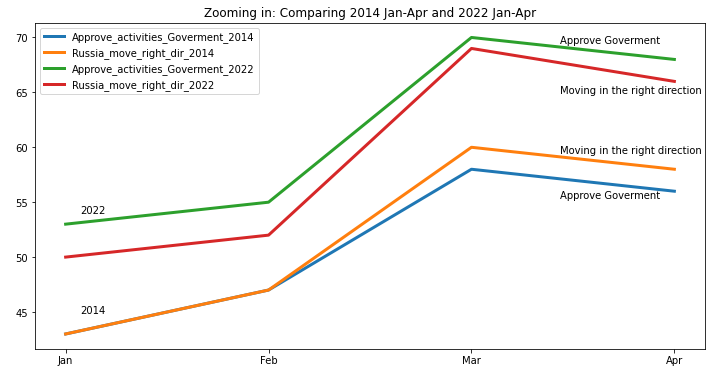

In [20]:

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(ua_concat[['Approve_activities_Goverment_2014','Russia_move_right_dir_2014' ]], linewidth=3)
ax1.plot(ua_concat[['Approve_activities_Goverment_2022', 'Russia_move_right_dir_2022']], linewidth=3) 

ax1.legend(['Approve_activities_Goverment_2014','Russia_move_right_dir_2014',  'Approve_activities_Goverment_2022', 'Russia_move_right_dir_2022'])

ax1.set_xticks([0,1,2,3])
ax1.set_xticklabels(['Jan','Feb','Mar','Apr'])
ax1.annotate('2014',xy=(80,60), xycoords='figure points')
ax1.annotate('2022',xy=(80,160), xycoords='figure points')
ax1.annotate('Approve Goverment',xy=(560,175), xycoords='figure points')
ax1.annotate('Moving in the right direction',xy=(560,220), xycoords='figure points')
ax1.annotate('Approve Goverment',xy=(560,330), xycoords='figure points')
ax1.annotate('Moving in the right direction',xy=(560,280), xycoords='figure points')

plt.title('Zooming in: Comparing 2014 Jan-Apr and 2022 Jan-Apr')
plt.savefig('./out1.jpg',bbox_inches='tight')

In [21]:
val_2022 = ua_2022s_des[['mean','min','max']]
val_2014=ua_2014s_des[['mean','min','max']]

In [22]:
combo_describe = pd.concat([val_2014,val_2022]).T
combo_describe =combo_describe[['President_Approval_2014', 'President_Approval_2022','Government_Approval_2014','Government_Approval_2022','Right_direction_2014', 'Right_direction_2022' ]]
combo_describe =combo_describe.round(2)
coli = (combo_describe.columns).to_list()

In [23]:
from tabulate import tabulate

print(tabulate(combo_describe, headers = coli, tablefmt = 'presto'))


      |   President_Approval_2014 |   President_Approval_2022 |   Government_Approval_2014 |   Government_Approval_2022 |   Right_direction_2014 |   Right_direction_2022
------+---------------------------+---------------------------+----------------------------+----------------------------+------------------------+------------------------
 mean |                        74 |                     76.25 |                         51 |                       61.5 |                     52 |                  59.25
 min  |                        65 |                     69    |                         43 |                       53   |                     43 |                  50
 max  |                        82 |                     83    |                         58 |                       70   |                     60 |                  69


The spreads among the values in both time periods are similar, 
(for example : spread between the mean for ‘Government Approval’ and max value is 7 points in 2014, and about 8.5 points in 2022);  at this level randomness in the data is an issue, but, in my opinion, although on the surface there is higher support for the ‘military operation’ 2022 in Ukraine, this is not significantly greater than in 2014. Speculatively talking, support might be lower in 2022, than in 2014, in 2014 the legislative landscape and  Roskomnsdzor activities, respectively, were  less harsh and less efficient.

Further the usual decline in public support for military action which is generally expected after such action is taken, appears to be sharper in 2022 than in 2014, however again, this is speculation as it might be due to randomness and/or insufficient data. 

Conclusions and disclosure:
In conclusion, at this stage I would argue that up to the time the April polls were collected and published, there was support for the ‘military operation’ in Ukraine, however I would suggest that this support is closer to the mid 60% mark than 80% mark, because the ‘Russia moving in the right direction’ index is hovering around that mark. 
Additionally I would expect the downwards trend in approval ratings to continue in the soft indices(Government Approval, Russia moving in the right direction Index), while the President Approval ratings to remain relatively stable.  

Personal bias: although I have done my best to keep my personal ideas and feelings out of my investigation in the data these may have seeped in. 

Disclaimer: all of the above is my personal opinion and my  interpretation of the information available to me.


# Appendix1
<a id='Appendix1'></a>
# Roskomnsdzor: A brief time line
2008 formation of Roskomnsdzor: federal executive agency responsible for monitoring, controlling the media.  Its areas of responsibility include electronic media, mass communications, information technology and telecommunications, supervising compliance with the law, protecting the confidentiality of personal data being processed, and organizing the work of the radio-frequency service.

November 2012 : Internet blacklist law: Russia maintains a centralized internet blacklist (known as the "single register") maintained by Roskomnadzor. The list is used for the censorship of individual URLs, domain names, and IP addresses. It was originally introduced to block sites that contain materials advocating drug abuse and drug production, descriptions of suicide methods, and containing child pornography. It was subsequently amended to allow the blocking of materials that are classified as extremist.

2013: the blacklist law was amended with content "suspected of extremism".

2013 the Prosecutor General of Russia and Prosecutor General's Office can decide which websites may be blocked arbitrarily.

July 2014: The "Bloggers law" : amendment to existing anti-terrorism legislation which includes data localization and data retention provisions. Among other changes, it requires all web services to store the user data of Russian citizens on servers within the country.

In 2015, Russia's Security Council proposed a number of further Internet controls to prevent hostile "influence on the population of the country, especially young people, intended to weaken cultural and spiritual values".
2017  Ban on all software and websites related to circumventing internet filtering in Russia, including VPN software, anonymizers, and instructions on how to circumvent government website blocking.

April 2018, a Moscow court ordered the ban and blockage of the messaging app Telegram under anti-terrorism laws.

March 2019 :  Ban the publication of "unreliable socially significant information", and materials that show "clear disrespect" for the Russian Federation or "bodies exercising state power".

April 2021 Roskomnadzor started enforcing throttling of Twitter traffic in Russia

2021:  new regulation was passed that requires all operators of instant messaging services in Russia to establish the identity of users creating accounts in these services by means of verification of their mobile number.
Up to March 2022 infringement of the above laws resulted in fines. From the 4th of March 2022 infringement of these laws became a criminal offense, punishable with up to  15 years imprisonment.
" Federal Law of March 4, 2022 No. 32-FZ "On Amendments to the Criminal Code of the Russian Federation and Articles 31 and 151 of the Code of Criminal Procedure of the Russian Federation" (known in the media as the "Fake Law" or "Law on Military Censorship" ) - a federal law establishing criminal liability for the dissemination of knowingly false information about the use of the RF Armed Forces , as well as for public actions aimed at discrediting the use of the RF Armed Forces. 
A number of websites have been blocked in Russia since the beginning of the war, these are predominantly ‘social media’ and ‘news’ websites. Taking into consideration actions taken against russian independent media 

(sources: 
https://en.wikipedia.org/wiki/Mass_media_in_Russia, 
https://en.wikipedia.org/wiki/Roskomnadzor,
https://www.politico.eu/article/last-russia-independent-news-outlet-suspends-operations ,
https://www.top10vpn.com/research/websites-blocked-in-russia/,
https://freedomhouse.org/country/russia/freedom-net/
https://www.hrw.org/news/2022/03/07/russia-criminalizes-independent-war-reporting-anti-war-protests,https://ru.wikipedia.org/wiki/%D0%A4%D0%B5%D0%B4%D0%B5%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B7%D0%B0%D0%BA%D0%BE%D0%BD_%E2%84%96_32-%D0%A4%D0%97_2022_%D0%B3%D0%BE%D0%B4%D0%B0 
https://www.levada.ru/en/ratings/)

